## Random Resample

In [1]:
import numpy as np

types_df = {
    'id': np.dtype(int), 
    'click': np.dtype(int),       
    'hour': np.dtype(int),       
    'C1': np.dtype(int),          
    'banner_pos': np.dtype(int),  
    'site_id': np.dtype(str),     
    'site_domain': np.dtype(str),  
    'site_category': np.dtype(str),
    'app_id': np.dtype(str),       
    'app_domain': np.dtype(str),
    'app_category': np.dtype(str), 
    'device_id': np.dtype(str),    
    'device_ip': np.dtype(str),    
    'device_model': np.dtype(str),  
    'device_type': np.dtype(int),   
    'device_conn_type': np.dtype(int),
    'C14': np.dtype(int),   
    'C15': np.dtype(int),  
    'C16': np.dtype(int),   
    'C17': np.dtype(int),   
    'C18': np.dtype(int),   
    'C19': np.dtype(int),   
    'C20': np.dtype(int),   
    'C21':np.dtype(int)   
}

In [2]:
import random
import pandas as pd
import matplotlib.pyplot as plt


m = 40428967  
sample_size= 1200000
value = sorted(random.sample(range(1,m),m-sample_size))

parser = lambda n :pd.datetime.strptime(n,'%y%m%d%H')


df = pd.read_csv('./train.csv',parse_dates=['hour'],date_parser=parser,dtype=types_df,skiprows=value)

df.head()

C:\Users\David\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  # Remove the CWD from sys.path while we load stuff.


,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,...,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,871065379,0,2014-10-21,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15704,320,50,1722,0,35,100084,79
1,-1368576336,0,2014-10-21,1005,1,fe8cc448,9166c161,0569f928,ecad2386,7801e8d9,...,1,0,18993,320,50,2161,0,35,-1,157
2,-59070594,0,2014-10-21,1005,1,0eb72673,d2f72222,f028772b,ecad2386,7801e8d9,...,1,0,16208,320,50,1800,3,167,100075,23
3,-1976641901,0,2014-10-21,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15704,320,50,1722,0,35,-1,79
4,-152979991,0,2014-10-21,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15707,320,50,1722,0,35,-1,79


In [3]:
df.shape

(1200000, 24)


## EDA


In [4]:
df.columns

Index(['id', 'click', 'hour', 'C1', 'banner_pos', 'site_id', 'site_domain',
       'site_category', 'app_id', 'app_domain', 'app_category', 'device_id',
       'device_ip', 'device_model', 'device_type', 'device_conn_type', 'C14',
       'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200000 entries, 0 to 1199999
Data columns (total 24 columns):
 #   Column            Non-Null Count    Dtype         
---  ------            --------------    -----         
 0   id                1200000 non-null  int32         
 1   click             1200000 non-null  int32         
 2   hour              1200000 non-null  datetime64[ns]
 3   C1                1200000 non-null  int32         
 4   banner_pos        1200000 non-null  int32         
 5   site_id           1200000 non-null  object        
 6   site_domain       1200000 non-null  object        
 7   site_category     1200000 non-null  object        
 8   app_id            1200000 non-null  object        
 9   app_domain        1200000 non-null  object        
 10  app_category      1200000 non-null  object        
 11  device_id         1200000 non-null  object        
 12  device_ip         1200000 non-null  object        
 13  device_model      1200000 non-null  object

In [6]:
df.describe()

,id,click,C1,banner_pos,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
count,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06
mean,-4.263815e+05,1.700950e-01,1.004967e+03,2.883242e-01,1.014976e+00,3.310700e-01,1.884151e+04,3.188552e+02,6.007672e+01,2.112465e+03,1.433467e+00,2.272590e+02,5.320928e+04,8.337543e+01
std,1.239869e+09,3.757164e-01,1.094535e+00,5.091940e-01,5.265581e-01,8.548235e-01,4.958555e+03,2.098474e+01,4.723214e+01,6.094384e+02,1.326328e+00,3.512472e+02,4.995731e+04,7.025758e+01
min,-2.147482e+09,0.000000e+00,1.001000e+03,0.000000e+00,0.000000e+00,0.000000e+00,3.750000e+02,1.200000e+02,2.000000e+01,1.120000e+02,0.000000e+00,3.300000e+01,-1.000000e+00,1.000000e+00
25%,-1.074689e+09,0.000000e+00,1.005000e+03,0.000000e+00,1.000000e+00,0.000000e+00,1.692000e+04,3.200000e+02,5.000000e+01,1.863000e+03,0.000000e+00,3.500000e+01,-1.000000e+00,2.300000e+01
50%,-6.379045e+05,0.000000e+00,1.005000e+03,0.000000e+00,1.000000e+00,0.000000e+00,2.034600e+04,3.200000e+02,5.000000e+01,2.323000e+03,2.000000e+00,3.900000e+01,1.000480e+05,6.100000e+01
75%,1.073924e+09,0.000000e+00,1.005000e+03,1.000000e+00,1.000000e+00,0.000000e+00,2.189400e+04,3.200000e+02,5.000000e+01,2.526000e+03,3.000000e+00,1.710000e+02,1.000940e+05,1.010000e+02
max,2.147481e+09,1.000000e+00,1.012000e+03,7.000000e+00,5.000000e+00,5.000000e+00,2.405200e+04,1.024000e+03,1.024000e+03,2.758000e+03,3.000000e+00,1.839000e+03,1.002480e+05,2.550000e+02


In [7]:
df.isnull().sum()

id                  0
click               0
hour                0
C1                  0
banner_pos          0
site_id             0
site_domain         0
site_category       0
app_id              0
app_domain          0
app_category        0
device_id           0
device_ip           0
device_model        0
device_type         0
device_conn_type    0
C14                 0
C15                 0
C16                 0
C17                 0
C18                 0
C19                 0
C20                 0
C21                 0
dtype: int64

0    995886
1    204114
Name: click, dtype: int64


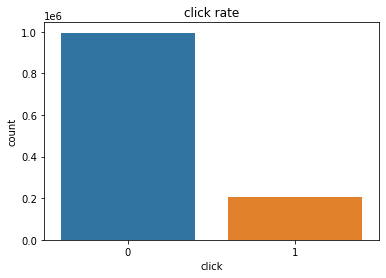

In [8]:
import seaborn as sns

print(df['click'].value_counts())

sns.countplot(x='click',data=df)

plt.title('click rate')
plt.show()

Text(0.5, 1.0, 'click_num and time')

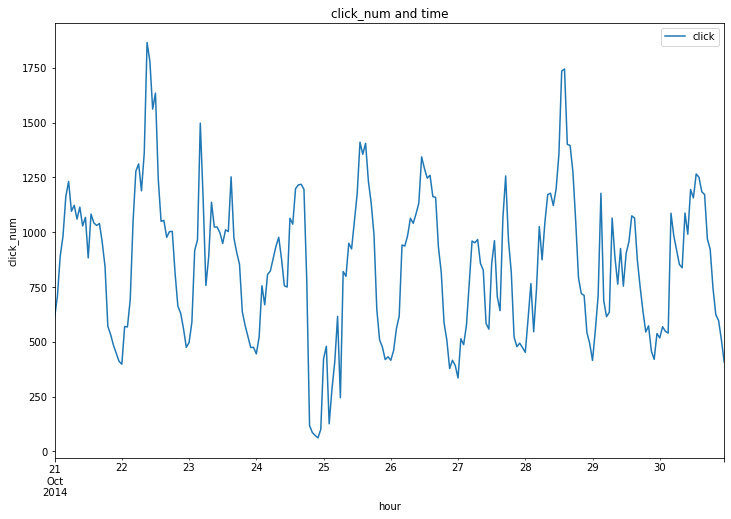

In [9]:
df.hour.describe()

df.groupby('hour').agg({'click':'sum'}).plot(figsize=(12,8))

plt.ylabel('click_num')
plt.title('click_num and time')

In [10]:
df['time'] = df.hour.apply(lambda x : x.hour)
df.sample(10)

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,...,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21,time
584124,-4688344,0,2014-10-25 19:00:00,1005,0,85f751fd,c4e18dd6,50e219e0,7358e05e,b9528b13,...,0,16615,320,50,1863,3,39,-1,23,19
138644,-1152168324,0,2014-10-22 04:00:00,1005,0,85f751fd,c4e18dd6,50e219e0,66f5e02e,6f7ca2ba,...,2,21790,320,50,2513,3,35,100034,68,4
1067254,920315572,0,2014-10-29 20:00:00,1005,0,85f751fd,c4e18dd6,50e219e0,febd1138,82e27996,...,0,21611,320,50,2480,3,297,100111,61,20
1019809,1383075968,0,2014-10-29 11:00:00,1005,0,85f751fd,c4e18dd6,50e219e0,92f5800b,ae637522,...,3,21189,320,50,2424,1,175,100193,71,11
420854,1615513026,0,2014-10-24 06:00:00,1005,0,85f751fd,c4e18dd6,50e219e0,98fed791,d9b5648e,...,0,21611,320,50,2480,3,297,100111,61,6
445196,2075819007,0,2014-10-24 11:00:00,1005,0,d9750ee7,98572c79,f028772b,ecad2386,7801e8d9,...,0,6392,320,50,547,3,47,-1,23,11
659671,-1017668335,0,2014-10-26 13:00:00,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,0,15703,320,50,1722,0,35,-1,79,13
1158629,-192004383,0,2014-10-30 14:00:00,1005,0,f6cba1bd,5c9c05b7,f028772b,ecad2386,7801e8d9,...,0,24035,320,50,2755,0,35,100081,76,14
458270,-584836112,0,2014-10-24 13:00:00,1005,0,85f751fd,c4e18dd6,50e219e0,92f5800b,ae637522,...,3,21191,320,50,2424,1,161,100193,71,13
849850,-1629674817,0,2014-10-28 09:00:00,1005,0,85f751fd,c4e18dd6,50e219e0,f53417e1,0e8616ad,...,2,23143,320,50,2665,0,34,-1,221,9


Text(0, 0.5, 'click_num')

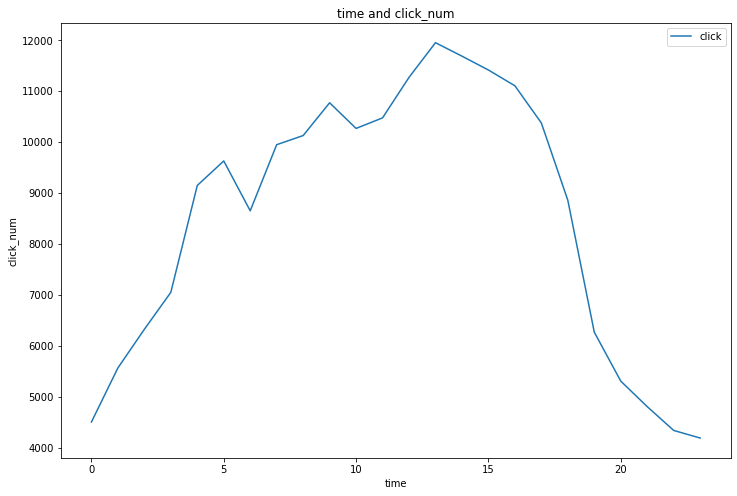

In [11]:
df.groupby('time').agg({'click':'sum'}).plot(figsize=(12,8))

plt.title('time and click_num')
plt.ylabel('click_num')

Text(0.5, 1.0, 'Impression and click')

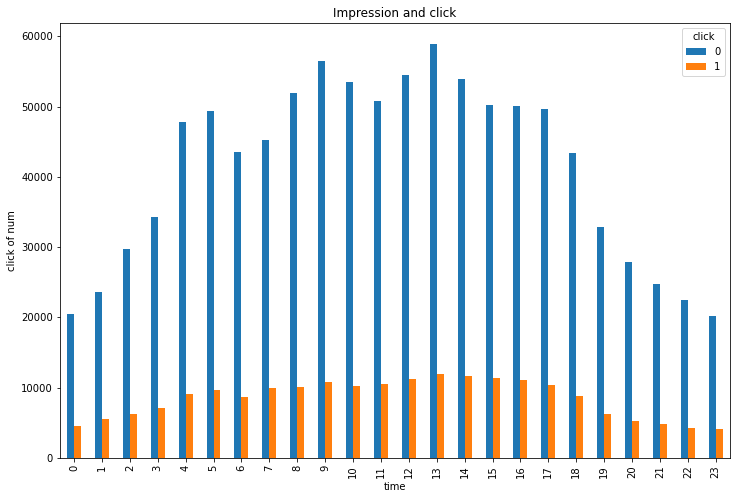

In [12]:
df.groupby(['time','click']).size().unstack().plot(kind='bar',figsize=(12,8))
plt.ylabel('click of num')
plt.title('Impression and click')

In [13]:
df_click_1 = df[df['click'] == 1]
df_hour = df[['time','click']].groupby(['time']).count().reset_index()
df_hour = df_hour.rename(columns={'click':'impression'})
df_hour['click'] = df_click_1[['time','click']].groupby(['time']).count().reset_index()['click']
df_hour['ctr'] = df_hour['click'] / df_hour['impression'] * 100

df_hour.head()

,time,impression,click,ctr
0,0,25013,4510,18.030624
1,1,29241,5571,19.052016
2,2,36126,6329,17.519238
3,3,41307,7054,17.077009
4,4,56982,9151,16.059457


Text(0.5, 1.0, 'ctr and time')

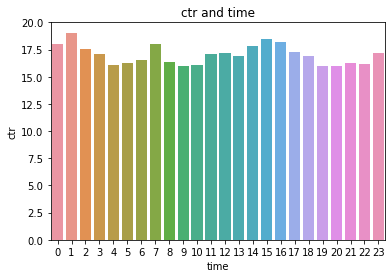

In [14]:
sns.barplot(y='ctr',x='time',data=df_hour)
plt.title('ctr and time')

Text(0, 0.5, 'click of num')

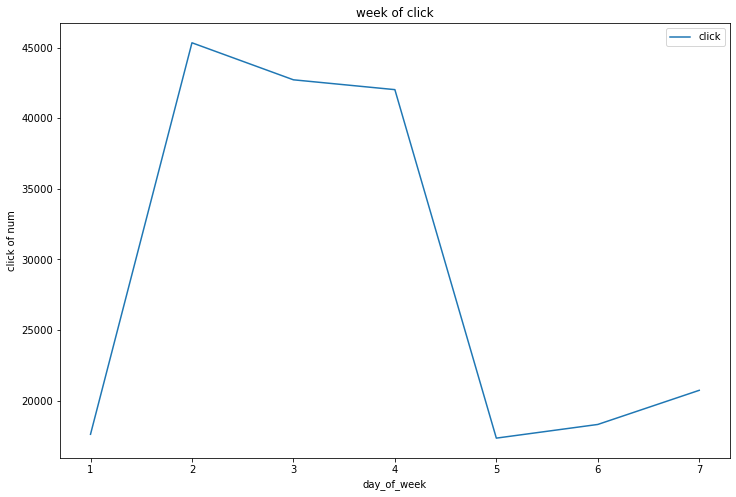

In [15]:
df['day_of_week'] = df.hour.apply(lambda x : x.weekday())
df['day_of_week'] = df['day_of_week'] + 1
df.groupby('day_of_week').agg({'click':'sum'}).plot(figsize=(12,8))
plt.title('week of click')
plt.ylabel('click of num')

Text(0.5, 1.0, 'Impression and click')

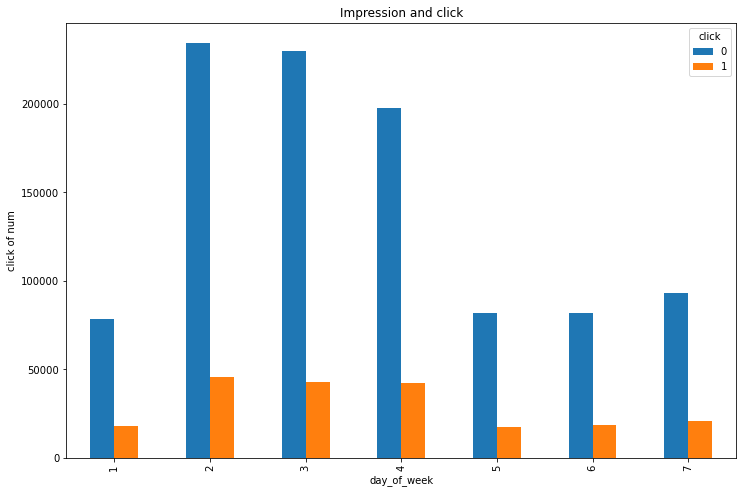

In [16]:
df.groupby(['day_of_week','click']).size().unstack().plot(kind='bar',figsize=(12,8))
plt.ylabel('click of num')
plt.title('Impression and click')

Text(0.5, 1.0, 'week of ctr')

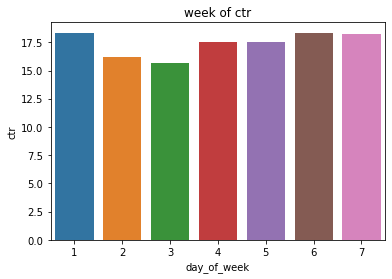

In [17]:
df_click_1 = df[df['click'] == 1]
df_dayweek = df[['day_of_week','click']].groupby('day_of_week').count().reset_index()
df_dayweek = df_dayweek.rename(columns={'click':'impression'})
df_dayweek['click'] = df_click_1[['day_of_week','click']].groupby('day_of_week').count().reset_index()['click']
df_dayweek['ctr'] = df_dayweek['click'] / df_dayweek['impression']*100
sns.barplot(x='day_of_week',y='ctr',data=df_dayweek)
plt.title('week of ctr')

In [18]:
df.C1.value_counts() / len(df)

1005    0.918587
1002    0.055061
1010    0.022318
1012    0.002802
1007    0.000878
1001    0.000227
1008    0.000128
Name: C1, dtype: float64

In [19]:
c1_values = df.C1.unique()
c1_values.sort()
ctr_list = []
for j in c1_values:
    ctr = df.loc[np.where((df.C1 == j))].click.mean()
    ctr_list.append(ctr)
    print('C1 values:{},click_rate:{}'.format(j,ctr))

C1 values:1001,click_rate:0.03676470588235294
C1 values:1002,click_rate:0.2120987392732281
C1 values:1005,click_rate:0.16957028188231196
C1 values:1007,click_rate:0.04083570750237417
C1 values:1008,click_rate:0.14285714285714285
C1 values:1010,click_rate:0.09521320289746844
C1 values:1012,click_rate:0.16567519333729921


Text(0, 0.5, 'click of num')

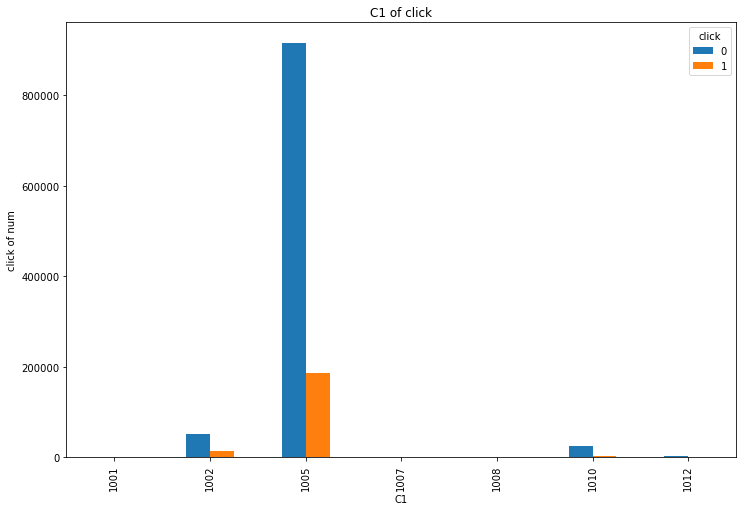

In [20]:
df.groupby(['C1','click']).size().unstack().plot(kind='bar',figsize=(12,8))
plt.title('C1 of click')
plt.ylabel('click of num')

Text(0.5, 1.0, 'C1 of ctr')

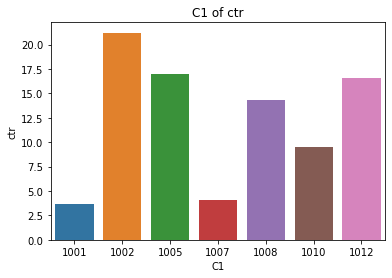

In [21]:
df_c1 = df[['C1','click']].groupby(['C1']).count().reset_index()
df_c1 = df_c1.rename(columns={'click':'impression'})
df_c1['click'] = df_click_1[['C1','click']].groupby('C1').count().reset_index()['click']
df_c1['ctr'] = df_c1['click'] / df_c1['impression'] * 100
sns.barplot(x='C1',y='ctr',data=df_c1)
plt.title('C1 of ctr')

In [22]:
df.C15.value_counts() / len(df)

320     0.932858
300     0.057728
216     0.007416
728     0.001787
120     0.000068
1024    0.000062
480     0.000051
768     0.000032
Name: C15, dtype: float64

In [23]:
c15_value = df.C15.unique()
c15_value.sort()

ctr_list = []
for k in c15_value:
    ctr = df.loc[np.where((df.C15 == k))].click.mean()
    ctr_list.append(ctr)
    print('C15 values:{}, click rate:{}'.format(k,ctr))


C15 values:120, click rate:0.024390243902439025
C15 values:216, click rate:0.1308012136195078
C15 values:300, click rate:0.3576285132735698
C15 values:320, click rate:0.1589881984476014
C15 values:480, click rate:0.3114754098360656
C15 values:728, click rate:0.06809701492537314
C15 values:768, click rate:0.42105263157894735
C15 values:1024, click rate:0.22972972972972974


Text(0.5, 1.0, 'c15 of click')

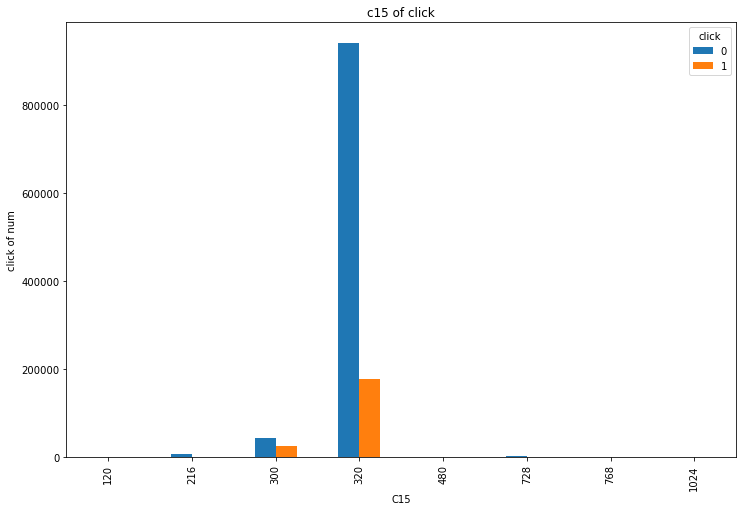

In [24]:
df.groupby(['C15','click']).size().unstack().plot(kind='bar',figsize=(12,8))
plt.ylabel('click of num')
plt.title('c15 of click')

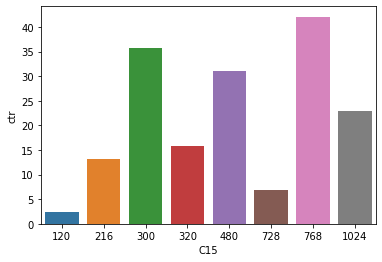

In [25]:
df_c15 = df[['C15','click']].groupby('C15').count().reset_index()
df_c15 = df_c15.rename(columns={'click':'impression'})
df_c15['click'] = df_click_1[['C15','click']].groupby('C15').count().reset_index()['click']
df_c15['ctr'] = df_c15['click'] / df_c15['impression'] * 100
sns.barplot(x='C15',y='ctr',data=df_c15)

In [26]:
df.banner_pos.value_counts() / len(df)

0    0.720097
1    0.278059
7    0.001145
2    0.000310
4    0.000210
5    0.000128
3    0.000051
Name: banner_pos, dtype: float64

In [27]:
banner_pos = df.banner_pos.unique()
banner_pos.sort()
ctr_list = []

for i in banner_pos:
    ctr = df.loc[np.where((df.banner_pos == i))].click.mean()
    ctr_list.append(ctr)
    print('banner_pos:{} , click:{}'.format(i,ctr))

banner_pos:0 , click:0.16462238331151915
banner_pos:1 , click:0.18371389782150682
banner_pos:2 , click:0.12634408602150538
banner_pos:3 , click:0.16393442622950818
banner_pos:4 , click:0.1984126984126984
banner_pos:5 , click:0.13725490196078433
banner_pos:7 , click:0.31513828238719066


Text(0, 0.5, 'click of num')

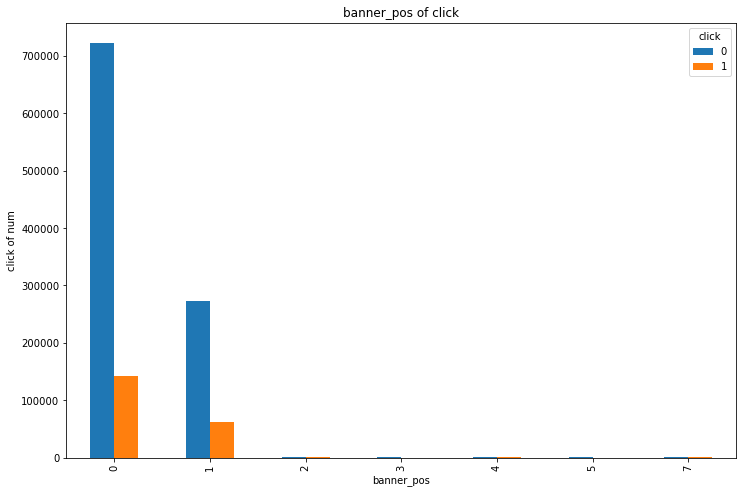

In [28]:
df.groupby(['banner_pos','click']).size().unstack().plot(kind='bar',figsize=(12,8))
plt.title('banner_pos of click')
plt.ylabel('click of num')

Text(0.5, 1.0, 'banner_pos of ctr')

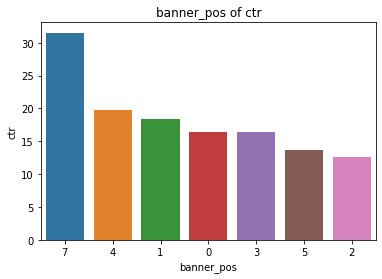

In [29]:
df_banner = df[['banner_pos','click']].groupby(['banner_pos']).count().reset_index()
df_banner = df_banner.rename(columns={'click':'impression'})
df_banner['click'] = df_click_1[['banner_pos','click']].groupby(['banner_pos']).count().reset_index()['click']
df_banner['ctr'] = df_banner['click'] / df_banner['impression'] * 100

sort_banner = df_banner.sort_values(by='ctr',ascending=False)['banner_pos'].tolist()
sns.barplot(x='banner_pos',y='ctr',data=df_banner,order=sort_banner)
plt.title('banner_pos of ctr')

In [30]:
df.device_type.value_counts() / len(df)

1    0.922619
0    0.055061
4    0.019238
5    0.003080
2    0.000002
Name: device_type, dtype: float64

Text(0.5, 1.0, 'device_type of click')

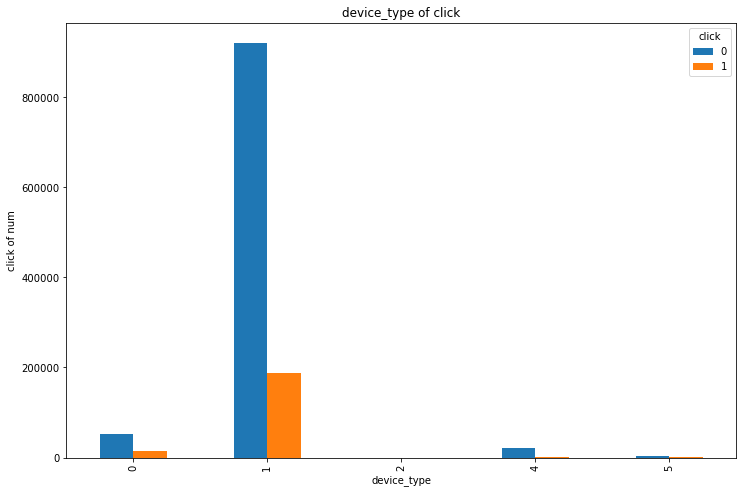

In [31]:
df[['device_type','click']].groupby(['device_type','click']).size().unstack().plot(kind='bar',figsize=(12,8))
plt.ylabel('click of num')
plt.title('device_type of click')

Text(0.5, 1.0, 'device_type of click')

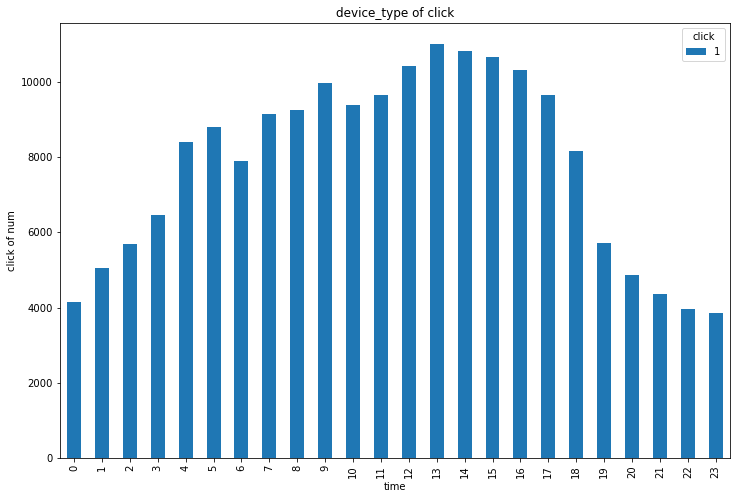

In [32]:
df_click_1[df_click_1['device_type'] == 1].groupby(['time','click']).size().unstack().plot(kind='bar',figsize=(12,8))
plt.ylabel('click of num')
plt.title('device_type of click')

In [33]:
device_click = df_click_1.groupby(['device_type']).agg({'click':'sum'}).reset_index()
device_impression = df.groupby(['device_type']).agg({'click':'count'}).rename(columns={'click':'impression'}).reset_index()
df_merge = pd.merge(left=device_click,right=device_impression,how='inner',on='device_type')
df_merge['ctr'] = df_merge['click'] / df_merge['impression'] * 100
df_merge

,device_type,click,impression,ctr
0,0,14014,66073,21.209874
1,1,187550,1107143,16.939998
2,4,2184,23086,9.460279
3,5,366,3696,9.902597


Text(0.5, 1.0, 'device_type of ctr')

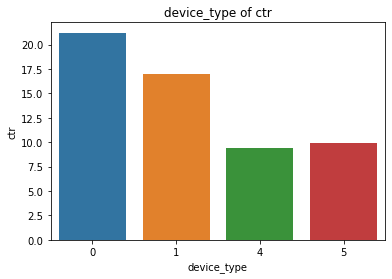

In [34]:
sns.barplot(x='device_type',y='ctr',data=df_merge)
plt.title('device_type of ctr')

## Build Model 1(LGB)

In [35]:
df.head()

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,...,C14,C15,C16,C17,C18,C19,C20,C21,time,day_of_week
0,871065379,0,2014-10-21,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,15704,320,50,1722,0,35,100084,79,0,2
1,-1368576336,0,2014-10-21,1005,1,fe8cc448,9166c161,0569f928,ecad2386,7801e8d9,...,18993,320,50,2161,0,35,-1,157,0,2
2,-59070594,0,2014-10-21,1005,1,0eb72673,d2f72222,f028772b,ecad2386,7801e8d9,...,16208,320,50,1800,3,167,100075,23,0,2
3,-1976641901,0,2014-10-21,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,15704,320,50,1722,0,35,-1,79,0,2
4,-152979991,0,2014-10-21,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,15707,320,50,1722,0,35,-1,79,0,2


In [36]:
obj_columns = df.columns
obj_list_type = df.dtypes
new_col = '_int'

for i in range(0,len(obj_columns)):
    if obj_list_type[i] == object:
        df[obj_columns[i]+new_col] = df[obj_columns[i]].map(lambda a :hash(a))
        df.drop([obj_columns[i]],axis=1,inplace=True)
df.head()
    

,id,click,hour,C1,banner_pos,device_type,device_conn_type,C14,C15,C16,...,day_of_week,site_id_int,site_domain_int,site_category_int,app_id_int,app_domain_int,app_category_int,device_id_int,device_ip_int,device_model_int
0,871065379,0,2014-10-21,1005,0,1,0,15704,320,50,...,2,-7549442696883768289,8945859128122314015,-8025730631660623144,3445915112977584600,-1954159502144851589,6941426943955565896,5801539304155984052,-2914286055196426313,-1909767534354745919
1,-1368576336,0,2014-10-21,1005,1,1,0,18993,320,50,...,2,2960427083784969724,1384918225132565098,-7428779714675867378,3445915112977584600,-1954159502144851589,6941426943955565896,5801539304155984052,2682004289094939851,-3767406907808041850
2,-59070594,0,2014-10-21,1005,1,1,0,16208,320,50,...,2,9136739585472739302,-9035857728529529992,-1199179336024497304,3445915112977584600,-1954159502144851589,6941426943955565896,5801539304155984052,-2022182251022548972,9140763846059668281
3,-1976641901,0,2014-10-21,1005,0,1,0,15704,320,50,...,2,-7549442696883768289,8945859128122314015,-8025730631660623144,3445915112977584600,-1954159502144851589,6941426943955565896,5801539304155984052,-2690061421966385454,-8685132460542728925
4,-152979991,0,2014-10-21,1005,0,1,0,15707,320,50,...,2,-7549442696883768289,8945859128122314015,-8025730631660623144,3445915112977584600,-1954159502144851589,6941426943955565896,5801539304155984052,235730577157277825,-8796388463822736172


In [37]:
df = df.drop(['hour'],axis=1)

In [71]:
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import GridSearchCV
import lightgbm as lgb


#df.drop(['hour'],axis=1,inplace=True)


x = df.loc[:,df.columns != 'click']
y = df.click.values

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

lgb_t = lgb.Dataset(x_train,y_train)
lgb_ev = lgb.Dataset(x_test,y_test)

'''
params = {
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'metric': { 'binary_logloss'},
    'num_iterations':100,
    'num_leaves': 31,
    'max_depth': 10,
    'learning_rate': 0.1,
    'feature_fraction': 0.7,
    'bagging_fraction': 1, 
    'bagging_freq': 3, 
    'verbose': 0
}
'''

params = {'max_depth':[5,10,15,20],
         'learning_rate':[0.1,0.2,0.3,0.4],
         'feature_fraction':[0.5,0.6,0.7,0.8],
         'bagging_fraction':[1,2,3,4],
         'bagging_freq':[1,2,3,4],
         'lambda_l1':[0.1,0.3,0.5,0.7],
         'lambda_l2':[0,5,10,15] 
         }




gbm = lgb.LGBMRegressor(boosting_type='gbdt',learning_rate=0.1,device = 'gpu')

gr_gbm = GridSearchCV(gbm,param_grid=params,cv=4,scoring='neg_mean_squared_error')

gr_gbm.fit(x_train,y_train)


KeyboardInterrupt: 

In [46]:
gr_gbm.best_params_

{'bagging_fraction': 1,
 'bagging_freq': 1,
 'feature_fraction': 0.5,
 'lambda_l1': 0.3,
 'learning_rate': 0.3,
 'max_depth': 15}

In [52]:
pred = gr_gbm.predict(x_test)
print(pred)


[0.20055276 0.22309785 0.16940594 ... 0.05135325 0.08781837 0.28653978]


In [49]:
from sklearn.metrics import mean_squared_error

print('mse:',mean_squared_error(y_test,pred))

mse: 0.12574521362698055


## Build Model 2(XGB)

In [41]:
import xgboost as xgb

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)



params = {
        "objective": "binary:logistic",
        "booster" : "gbtree",
        "eval_metric": "logloss",        
        "silent": 1,
}

xtrain  = xgb.DMatrix(x_train,y_train)
xtest = xgb.DMatrix(x_test,y_test)
eval_list = [(xtrain,'eval'),(xtest,'train')]


xgboost = xgb.train(params,xtrain,num_boost_round=4000,evals=eval_list,early_stopping_rounds=500,verbose_eval=True)

[15:48:31] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	eval-logloss:0.57236	train-logloss:0.57191
Multiple eval metrics have been passed: 'train-logloss' will be used for early stopping.

Will train until train-logloss hasn't improved in 500 rounds.
[1]	eval-logloss:0.50780	train-logloss:0.50733
[2]	eval-logloss:0.47093	train-logloss:0.47032
[3]	eval-logloss:0.44928	train-logloss:0.44861
[4]	eval-logloss:0.43600	train-logloss:0.43533
[5]	eval-logloss:0.42812	train-logloss:0.42724
[6]	eval-logloss:0.42211	train-logloss:0.42131
[7]	eval-logloss:0.41899	train-logloss:0.41827
[8]	eval-logloss:0.41700	train-logloss:0.41622
[9]	eval-logloss:0.41568	train-logloss:0.

[159]	eval-logloss:0.39039	train-logloss:0.39881
[160]	eval-logloss:0.39036	train-logloss:0.39883
[161]	eval-logloss:0.39033	train-logloss:0.39881
[162]	eval-logloss:0.39023	train-logloss:0.39880
[163]	eval-logloss:0.39011	train-logloss:0.39875
[164]	eval-logloss:0.39001	train-logloss:0.39875
[165]	eval-logloss:0.38993	train-logloss:0.39875
[166]	eval-logloss:0.38988	train-logloss:0.39874
[167]	eval-logloss:0.38984	train-logloss:0.39875
[168]	eval-logloss:0.38980	train-logloss:0.39871
[169]	eval-logloss:0.38976	train-logloss:0.39871
[170]	eval-logloss:0.38972	train-logloss:0.39871
[171]	eval-logloss:0.38966	train-logloss:0.39871
[172]	eval-logloss:0.38961	train-logloss:0.39870
[173]	eval-logloss:0.38956	train-logloss:0.39870
[174]	eval-logloss:0.38952	train-logloss:0.39871
[175]	eval-logloss:0.38948	train-logloss:0.39872
[176]	eval-logloss:0.38939	train-logloss:0.39875
[177]	eval-logloss:0.38935	train-logloss:0.39874
[178]	eval-logloss:0.38932	train-logloss:0.39874
[179]	eval-logloss:0

[327]	eval-logloss:0.38075	train-logloss:0.39831
[328]	eval-logloss:0.38070	train-logloss:0.39830
[329]	eval-logloss:0.38063	train-logloss:0.39832
[330]	eval-logloss:0.38057	train-logloss:0.39832
[331]	eval-logloss:0.38052	train-logloss:0.39833
[332]	eval-logloss:0.38045	train-logloss:0.39833
[333]	eval-logloss:0.38044	train-logloss:0.39833
[334]	eval-logloss:0.38040	train-logloss:0.39833
[335]	eval-logloss:0.38034	train-logloss:0.39834
[336]	eval-logloss:0.38028	train-logloss:0.39833
[337]	eval-logloss:0.38022	train-logloss:0.39833
[338]	eval-logloss:0.38014	train-logloss:0.39833
[339]	eval-logloss:0.38005	train-logloss:0.39833
[340]	eval-logloss:0.38000	train-logloss:0.39834
[341]	eval-logloss:0.37994	train-logloss:0.39834
[342]	eval-logloss:0.37990	train-logloss:0.39835
[343]	eval-logloss:0.37984	train-logloss:0.39835
[344]	eval-logloss:0.37977	train-logloss:0.39833
[345]	eval-logloss:0.37971	train-logloss:0.39833
[346]	eval-logloss:0.37967	train-logloss:0.39833
[347]	eval-logloss:0

KeyboardInterrupt: 

In [ ]:
dtest = xgb.DMatrix(x_test)
pred = xgboost.predict(dtest)
pred

In [ ]:
print('mae:',mean_squared_error(y_test,pred))

## Build Model 3(LR)

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression(normalize=True)

lr.fit(x_train,y_train)

pred = lr.predict(x_test)

print('mae:',mean_squared_error(y_test,pred))

## Test Parser

In [54]:
parser = lambda a : pd.datetime.strptime(a,'%y%m%d%H')
test_df = pd.read_csv('./test.csv',parse_dates=['hour'],date_parser = parser)

C:\Users\David\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """Entry point for launching an IPython kernel.


In [55]:
test_df['time'] = test_df.hour.apply(lambda a : a.hour)

In [56]:
test_df['day_of_week'] = test_df.hour.apply(lambda x : x.weekday())
test_df['day_of_week'] = test_df['day_of_week'] + 1

In [57]:
test_df.head()

,id,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,...,C14,C15,C16,C17,C18,C19,C20,C21,time,day_of_week
0,1.000017e+19,2014-10-31,1005,0,235ba823,f6ebf28e,f028772b,ecad2386,7801e8d9,07d7df22,...,8330,320,50,761,3,175,100075,23,0,5
1,1.000018e+19,2014-10-31,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,...,22676,320,50,2616,0,35,100083,51,0,5
2,1.000055e+19,2014-10-31,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,...,22676,320,50,2616,0,35,100083,51,0,5
3,1.000109e+19,2014-10-31,1005,0,85f751fd,c4e18dd6,50e219e0,51cedd4e,aefc06bd,0f2161f8,...,18648,320,50,1092,3,809,100156,61,0,5
4,1.000138e+19,2014-10-31,1005,0,85f751fd,c4e18dd6,50e219e0,9c13b419,2347f47a,f95efa07,...,23160,320,50,2667,0,47,-1,221,0,5


In [58]:

test_columns = test_df.columns
test_dtypes = test_df.dtypes
new_type = '_int'

for i in range(0,len(test_columns)):
    if test_dtypes[i] == object:
        test_df[test_columns[i]+new_type] = test_df[test_columns[i]].map(lambda a : hash(a))
        test_df.drop([test_columns[i]],axis=1,inplace=True)
        

In [59]:
test_df = test_df.drop(['hour'],axis=1)

In [60]:
test_df.columns

Index(['id', 'C1', 'banner_pos', 'device_type', 'device_conn_type', 'C14',
       'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21', 'time', 'day_of_week',
       'site_id_int', 'site_domain_int', 'site_category_int', 'app_id_int',
       'app_domain_int', 'app_category_int', 'device_id_int', 'device_ip_int',
       'device_model_int'],
      dtype='object')

In [ ]:
#test_df = test_df.drop(['time'],axis=1)
dtest = xgb.DMatrix(test_df)
test_pred = xgboost.predict(dtest)


In [62]:
gr_gbm_pred = gr_gbm.predict(test_df)
gr_gbm_pred

array([0.13841614, 0.21219883, 0.22265467, ..., 0.36219056, 0.03071302,
       0.10750346])

In [63]:
submit_df = pd.read_csv('./sampleSubmission.csv')
submit_df['click'] = gr_gbm_pred
submit_df.to_csv('./submit_4.csv',index=False)

In [ ]:
#dtest = lgb.Dataset(test_df)
test1_pred = gbm.predict(test_df)

In [ ]:
submit_df['click'] = test1_pred
submit_df.to_csv('./submit_2.csv',index=False)

In [ ]:
from mlxtend.regressor import StackingRegressor
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

lr = LinearRegression(normalize=True)
svr = SVR(kernel='rbf')
ridge = Ridge(random_state=1)

sr = StackingRegressor(regressors=[lr,svr],meta_regressor=ridge)

params = {'svr__C': [0.1, 1.0, 10.0],'svr__gamma': [0.1, 1.0, 10.0]}

sr_gr = GridSearchCV(estimator=sr,param_grid=params)
sr_gr.fit(x,y)

In [ ]:
sr_pred = sr.predict(test_df)

In [ ]:
submit_df['click'] = sr_pred

In [ ]:
submit_df.to_csv('./submit_3.csv',index=False)